In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import load
from numpy import save

import tensorflow as tf
from tensorflow import keras

In [2]:
# %%time
# Read all the files
# df1 = pd.read_csv('data/electron.txt', sep="  ", header=None,usecols = (0,2,3, 4,5))
# df2 = pd.read_csv('data/proton.txt', sep="  ", header=None,usecols = (0,2,3, 4,5))
# df3 = pd.read_csv('data/helium.txt', sep="  ", header=None,usecols = (0,2,3, 4,5))
# df4 = pd.read_csv('data/iron.txt', sep="  ", header=None,usecols = (0,2,3, 4,5))
# df5 = pd.read_csv('data/nitrogen.txt', sep="  ", header=None,usecols = (0,2,3, 4,5))
# df6 = pd.read_csv('data/silicon.txt', sep="  ", header=None,usecols = (0,2,3, 4,5))
# df7 = pd.read_csv('data/gamma.txt', sep="  ", header=None,usecols = (0,2,3, 4,5))

In [3]:
# # save to npy file
# save('files/electron.npy', df0)
# save('files/proton.npy', df1)
# save('files/helium.npy', df2)
# save('files/iron.npy', df3)
# save('files/nitrogen.npy', df4)
# save('files/silicon.npy', df5)
# save('files/gamma.npy', df6)

# Data cleaning

In [27]:
%%time
# load numpy array from npy file
df1 = load('files/electron.npy')
df2 = load('files/proton.npy')
df3 = load('files/helium.npy')
df4 = load('files/iron.npy')
df5 = load('files/nitrogen.npy')
df6 = load('files/silicon.npy')
df7 = load('files/gamma.npy')

Wall time: 3.21 s


In [28]:
%%time
#put the files as dataframe and concatenate them 
df1 = pd.DataFrame(data=df1)
df2 = pd.DataFrame(data=df2)
df3 = pd.DataFrame(data=df3)
df4 = pd.DataFrame(data=df4)
df5 = pd.DataFrame(data=df5)
df6 = pd.DataFrame(data=df6)
df7 = pd.DataFrame(data=df7)

df= pd.concat([df1,df2,df3,df4,df5,df6,df7], ignore_index=True)
#REWRITE THE NAME OF THE COLUMS
df.columns = [0,1,2,3,4]

Wall time: 4.89 s


I do it particle by particle

In [49]:
df = pd.DataFrame(data=df6) #here I set the particle 
df.columns = [0,1,2,3,4]

In [29]:
#number of events
events=len(df.groupby([0]).mean())
print(events)
rows=1854

23043


In [53]:
# INTENSIDAD max and min of every df
Imaximo=1458.8   
Iminimo=-2.1
#X,Y min of every df
Xminimo=1823
Yminimo=7370

In [52]:
#INTENSITIES <0 ARE SET TO 0
df.loc[(df[3] <0),[3]]=0

In [54]:
#REESCALE INTENSITIES FROM 0 TO 1
df[3]= (df[3] - Iminimo) / (Imaximo- Iminimo)

In [55]:
#DIVIDE NUMBER OF EVENTS BY 100 AND CONVERT IT TO INT
df[0] = df[0].astype(int)/100

In [56]:
#reescale x,y
df[2]=df[2]-Yminimo
df[1]=df[1]-Xminimo

In [57]:
#REESCALE THE PIXELS AND CONVERT IT TO INT
df[1]=round(df[1]/333)
df[2]=round(df[2]/192)
df[1]=df[1].astype(int)
df[2]=df[2].astype(int)

number of events:   
                   
               gamma:11999

               proton:3697

               electron: 2715

               helium: 3164

               nitrogen:2134

               silicon:1890

               iron:2095
               
               total:23043
                   
###### rows for every particle is 1854. Images are (54)x(92)

In [61]:
df=df.to_numpy()
save('files/silicon_n.npy', df)

In [62]:
%%time
#CREATE A 3D MATRIX WITH: EVENTS, ROWS AND FEATURES
dat=np.zeros((events,rows,3))
df_n=df[:,1:4]
k=0
for m in range (events):
    for j in range (1854):
        dat[m][j]=df_n[k]  # df[[1,2,3]]
        k=k+1

Wall time: 3.5 s


In [63]:
# save to npy file
save('files/silicon_np.npy', dat)

In [64]:
#create a squared image to feed to the nn
dset=np.zeros((events,int(df[:,1].max())+1,int(df[:,2].max())+1)) 

for m in range (events): #esto lo hago para cada evento
    for j in range (1854): #para todos los pixeles del evento #voy por cada fila de la lista original
        a=int(dat[m][j][0]) #cojo la pos x
        b=int(dat[m][j][1]) #cojo la pos y
        dset[m][a,b]=dat[m][j][2]

Wall time: 8.16 s


In [65]:
save('files/silicon_image.npy', dset)

In [49]:
%%time
#Save the images
for i in range (10):#(len(dset))
    plt.imshow(dset[i],cmap=plt.cm.binary, vmin=0, vmax=1)
    plt.savefig("images/helium/helium{0}.png".format(i)) 

Wall time: 0 ns


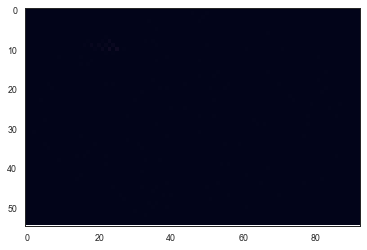

In [382]:
plt.imshow(dset[0], interpolation='none',aspect='auto', vmin=0, vmax=1)
fig_size = plt.rcParams["figure.figsize"]
plt.show()

# Split data

In [4]:
#load data
dset1 = load('files/gamma.npy')
dset2 = load('files/electron.npy')
dset3 = load('files/proton.npy')
dset4 = load('files/helium.npy')
dset5 = load('files/nitrogen.npy')
dset6 = load('files/iron.npy')
dset7 = load('files/silicon.npy')

In [4]:
#put the dataset together
data=np.concatenate((dset1,dset2,dset3,dset4,dset5,dset6,dset7),axis=0)

In [9]:
# In case I want all the data as a df
target1=np.zeros(dset1.shape[0]) 
target2=np.ones(dset2.shape[0])
target3=2*np.ones(dset3.shape[0])
target4=3*np.ones(dset4.shape[0])
target5=4*np.ones(dset5.shape[0])
target6=5*np.ones(dset6.shape[0])
target7=6*np.ones(dset7.shape[0])

target=np.concatenate((target1, target2, target3, target4, target5, target6, target7), axis=0)


df_x=pd.DataFrame(data=data)
df_y=pd.DataFrame(data=target)
df_tot=pd.concat([df_x,df_y], axis=0)
df_tot=df_tot.T.sample(frac=1).reset_index(drop=True)#this is the final df complete and shuffled
df_tot.columns = [0,1,2,3,4,5]

Wall time: 996 µs


In [27]:
# put it in df
df_1=pd.DataFrame(data=dset1)
df_2=pd.DataFrame(data=dset2)
df_3=pd.DataFrame(data=dset3)
df_4=pd.DataFrame(data=dset4)
df_5=pd.DataFrame(data=dset5)
df_6=pd.DataFrame(data=dset6)
df_7=pd.DataFrame(data=dset7)   

# Plots

In [9]:
lista=[dset1, dset2, dset3, dset4, dset5, dset6, dset7]
names=['gamma', 'electron', 'proton', 'helium', 'nitrogen','iron', 'silicon']

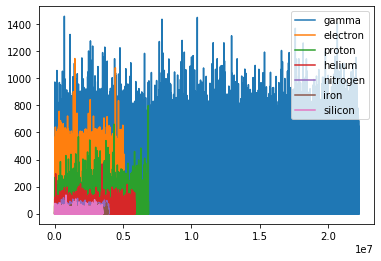

In [16]:
for i,j in zip(lista,names):
    plt.plot(i[:,3], label=j)
    
plt.legend(loc="upper right")
plt.show()

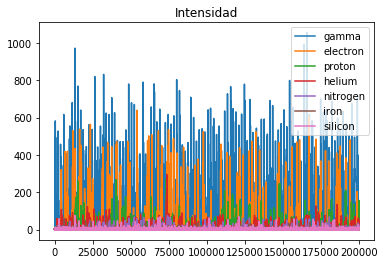

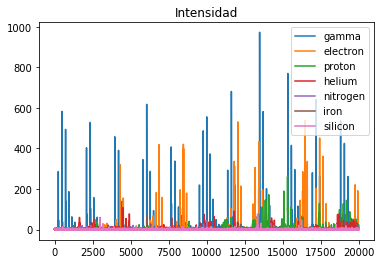

Wall time: 910 ms


In [17]:
%%time
#Ahora con rangos más pequeños

for i,j in zip(lista,names):
    plt.plot(i[1:200000,3], label=j)
plt.title('Intensidad')    
plt.legend(loc="upper right")
plt.show()

for i,j in zip(lista,names):
    plt.plot(i[1:20000,3], label=j)
plt.title('Intensidad')    
plt.legend(loc="upper right")
plt.show()


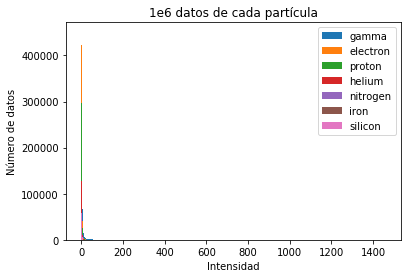

In [20]:
bins=500

for i,j in zip(lista,names):
    plt.hist(i[:1000000,3], label=j, bins = bins)
plt.title('1e6 datos de cada partícula')
plt.legend(loc="upper right")
plt.xlabel('Intensidad')
plt.ylabel('Número de datos')
plt.show()

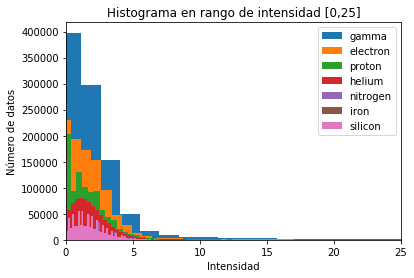

In [22]:
bins=1000

for i,j in zip(lista,names):
    plt.hist(i[:1000000,3], label=j, bins = bins)

plt.title('Histograma en rango de intensidad [0,25]')
plt.legend(loc="upper right")
plt.xlim(0, 25)
plt.xlabel('Intensidad')
plt.ylabel('Número de datos')

plt.show()
# plt.savefig('graficas/hist_red.png')


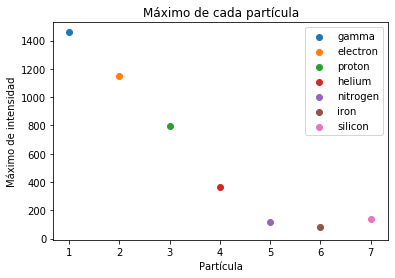

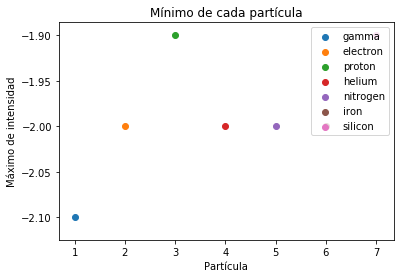

Wall time: 428 ms


In [25]:
%%time
plt.title('Máximo de cada partícula')
contador=1
for i,j in zip(lista,names):
    plt.scatter(contador, i[:,3].max(), label=j)
    contador=contador+1
    
plt.xlabel('Partícula')
plt.ylabel('Máximo de intensidad')
plt.legend(loc="upper right")
plt.show()


plt.title('Mínimo de cada partícula')
contador=1
for i,j in zip(lista,names):
    plt.scatter(contador,i[:,3].min(), label=j)
    contador=contador+1
    
plt.xlabel('Partícula')
plt.ylabel('Máximo de intensidad')
plt.legend(loc="upper right")
plt.show()

